In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


in this data we have categorical and numericcolumns in which one is our target and other are independent variablesand ther aretwo
categories present in our label hence we proceed with classification problem so we used classifiction ml model

In [16]:
print('size of dataset ',df.shape)
print('\n')
print('rows : {} columns : {}'.format(df.shape[0],df.shape[1]))

size of dataset  (1000, 40)


rows : 1000 columns : 40


In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [3]:
# there are two columns which isnot any relation with dataset so we removed this unwanted columns or uniqueid or zip code
df.drop(['policy_number','_c39','policy_csl','insured_zip'],axis=1, inplace= True)

In [24]:
# cheking theunique values present in data
for i in df.columns:
    print(df[i].value_counts(),df[i].dtypes)
    print(df[i].unique(),'\n')

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64 int64
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286

In [19]:
df.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                object
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries          

In [4]:
# and thereare some columns inwhich allvalues is negative and city which is unique sowe removed this
df.drop(['incident_location','capital-loss','incident_date','insured_hobbies','insured_occupation'],axis=1,inplace=True)

In [5]:
# seperate the object columns and numerical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]== "object":
        categorical_col.append(i)
print('categorical columns:',categorical_col)
print('\n')


#checking numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('numerical columns:',numerical_col)

categorical columns: ['policy_bind_date', 'policy_state', 'insured_sex', 'insured_education_level', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


numerical columns: ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [6]:
# there areonecolumn inwhich data  isobtained which have missing values also occer sowe removed that
df.drop('policy_bind_date',axis=1,inplace= True)

In [7]:
# thereare ? typevalues present so wereplacewith null values
df= df.replace("?",np.nan)

In [8]:
#checking nulls values
df.isna().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_relationship             0
capital-gains                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
auto_make                        0
auto_model                       0
auto_year           

In [9]:
# letsgo with fill missing valuesina given columns by usingfillna method

df['collision_type']= df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage']= df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available']= df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [10]:
df.isna().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_relationship           0
capital-gains                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_model                     0
auto_year                      0
fraud_reported                 0
dtype: int

In [31]:
#checking the statistics of data
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


@description given below of this dataset

1)there is no null values present in any of the columns hence its look like perfect 
2)the mean value of columns are well manner with proportion to median in some columns more differnce between max and 75% of 
dataset hence possibility to outlier present in these columns
3)we have also notice std deviation and meean and 25% percentile values which is well manner in some columns themean values 
  lower than std hence checking for outlier
4)the standard deviation of thedata islowerthan mean value hence its positive sign to our data is perfect for modeling

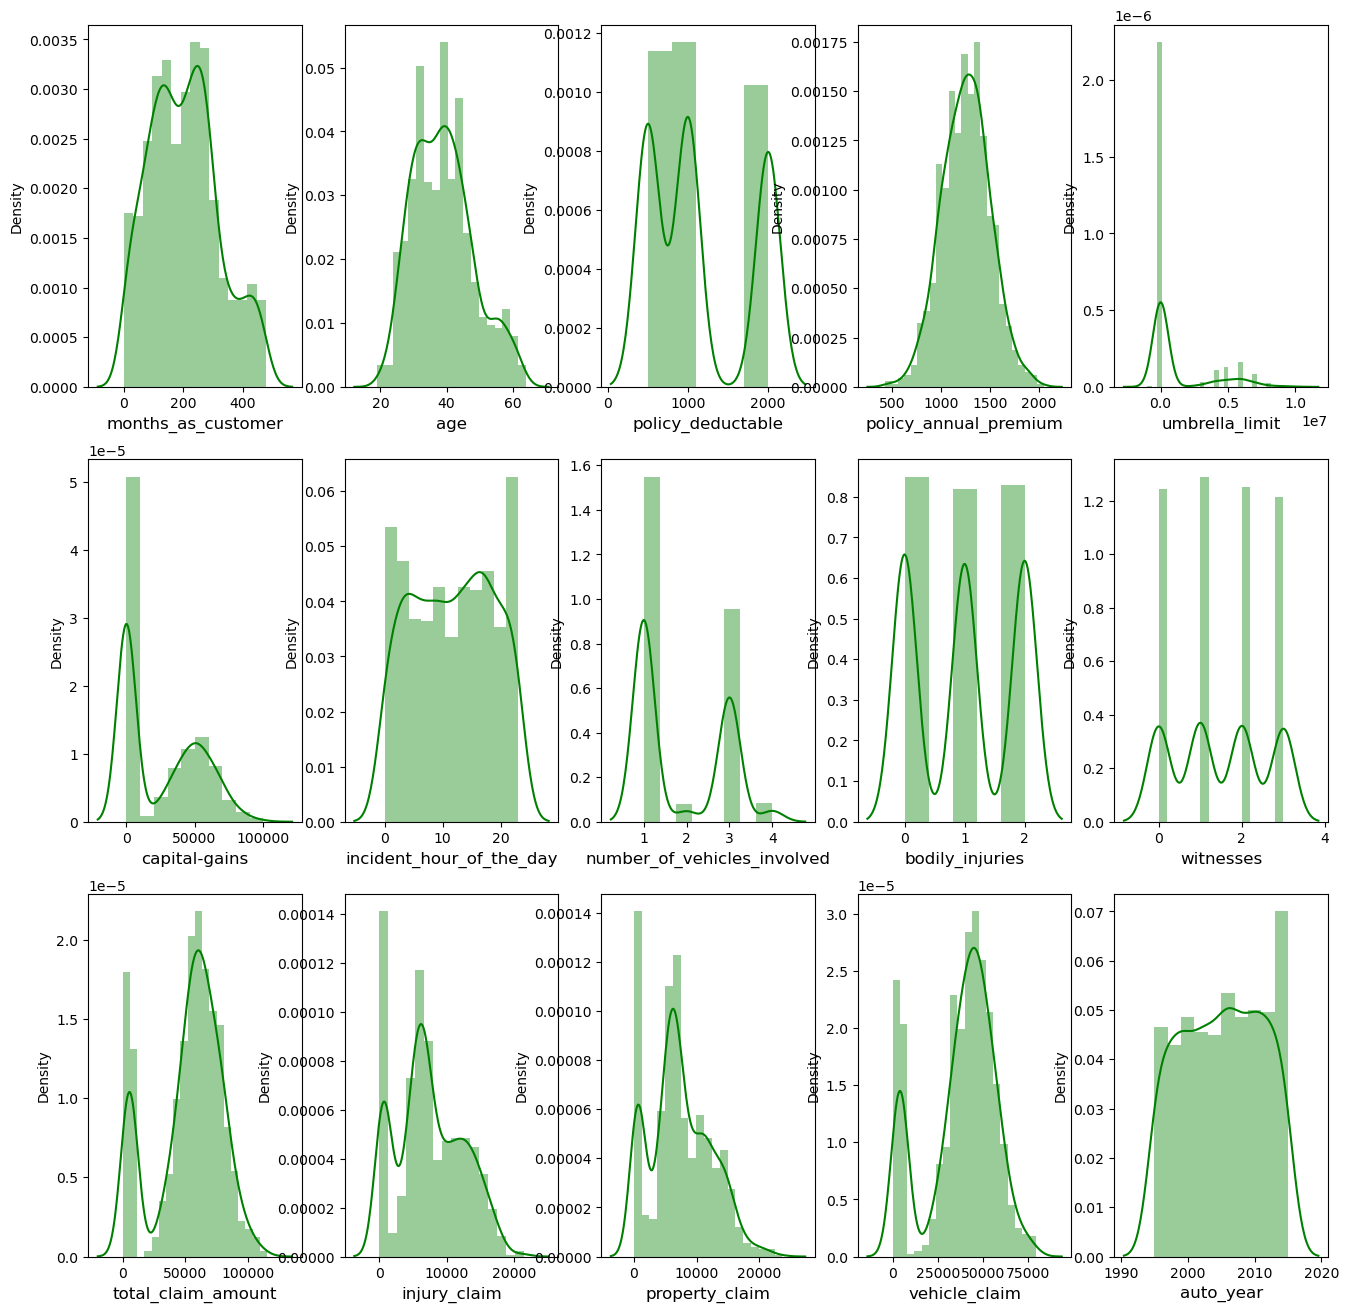

In [33]:
# checking the distribution through graph of data in each continuous coulmns
plt.figure(figsize=(16,16), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(df[col],color='g')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

In [11]:
#checking the skewness ofdataset
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [12]:
#apply cube root method to remove skewness in volume
df['umbrella_limit']= np.cbrt(df['umbrella_limit'])
df['vehicle_claim']= np.cbrt(df['vehicle_claim'])

In [13]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.523380
capital-gains                  0.478850
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -1.302471
auto_year                     -0.048289
dtype: float64

N    753
Y    247
Name: fraud_reported, dtype: int64


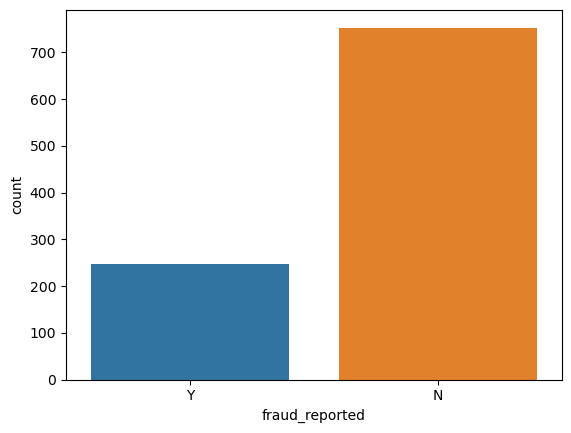

In [39]:
# data visualization
print(df['fraud_reported'].value_counts())
sns.countplot(x='fraud_reported',data=df)
plt.show()

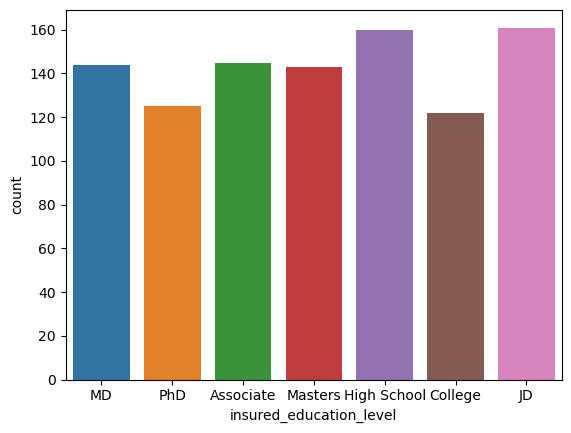

In [41]:
ax=sns.countplot(x='insured_education_level',data=df)
plt.show()

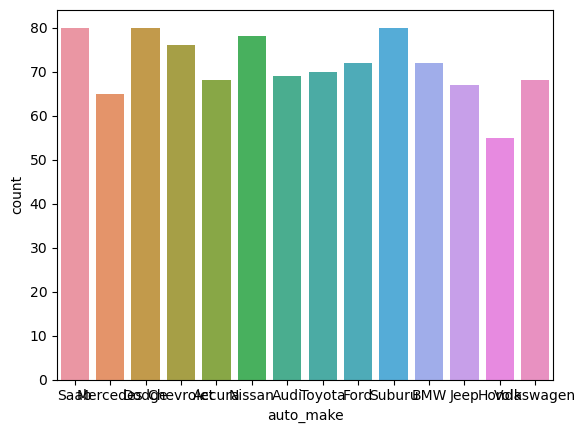

In [42]:
x=sns.countplot(x='auto_make',data=df)
plt.show()

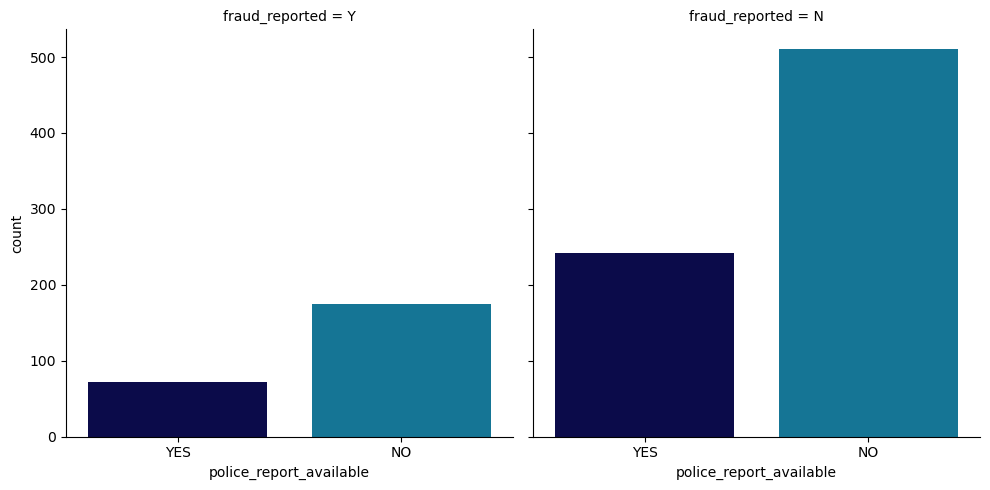

In [48]:
ax=sns.catplot(x='police_report_available',col='fraud_reported',data=df,kind='count',palette='ocean')
plt.show()

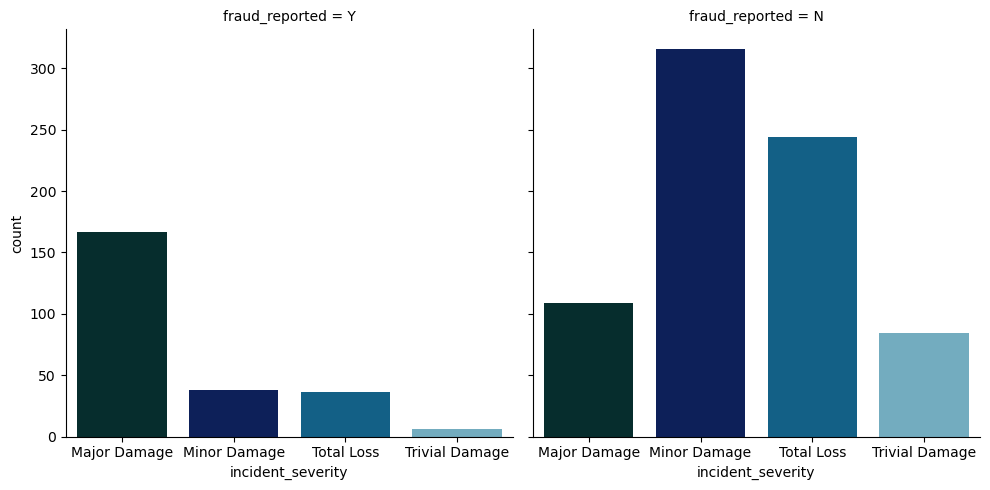

In [49]:
ax=sns.catplot(x='incident_severity',col='fraud_reported',data=df,kind='count',palette='ocean')
plt.show()

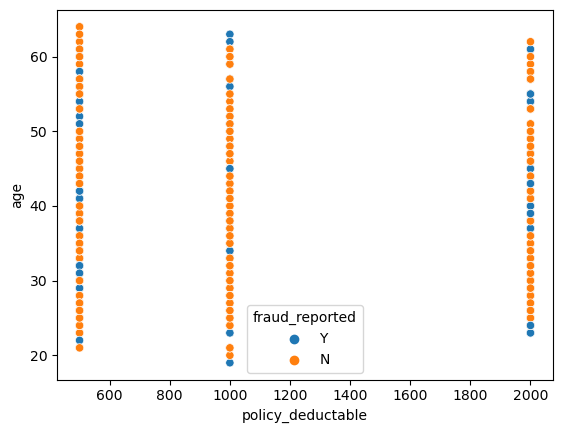

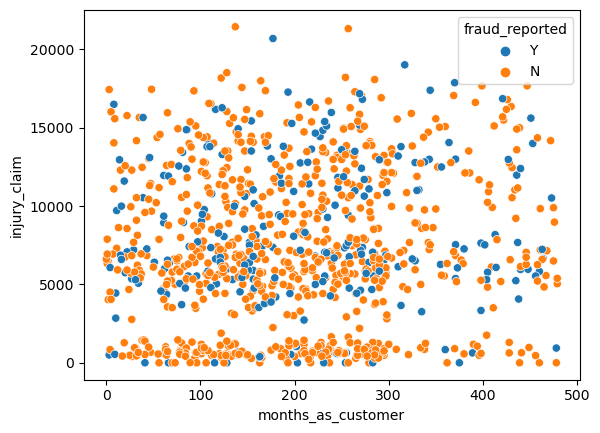

In [53]:
sns.scatterplot(x='months_as_customer',y='injury_claim',data=df,hue='fraud_reported')
plt.show()

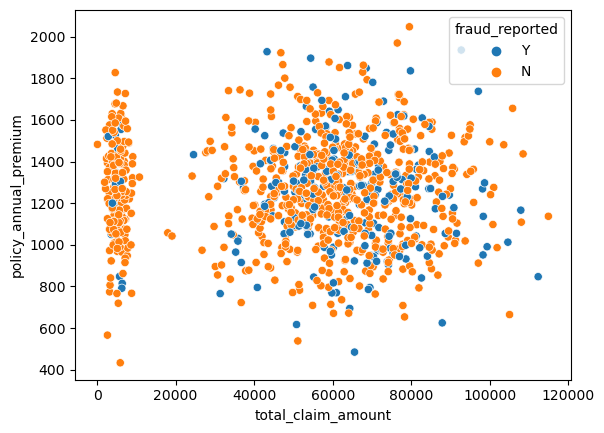

In [54]:
sns.scatterplot(x='total_claim_amount',y='policy_annual_premium',data=df,hue='fraud_reported')
plt.show()

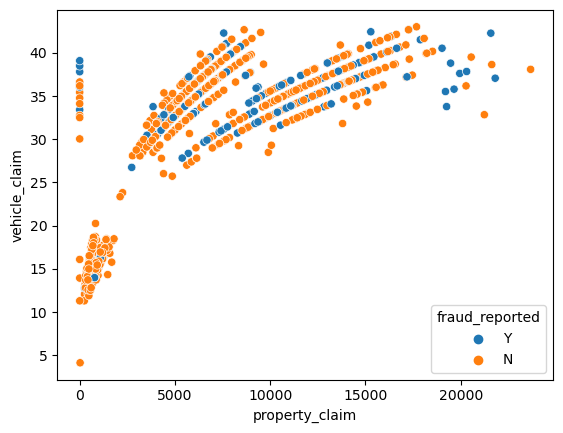

In [55]:
sns.scatterplot(x='property_claim',y='vehicle_claim',data=df,hue='fraud_reported')
plt.show()

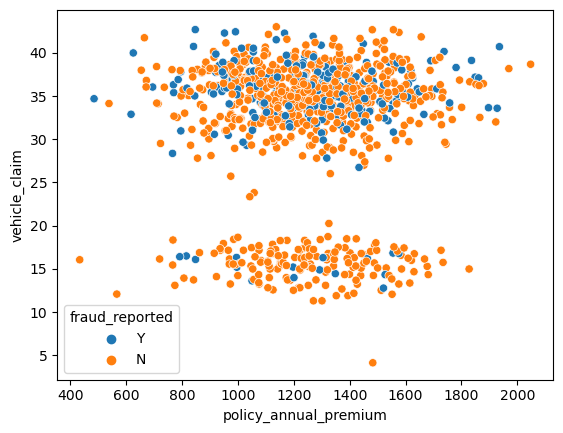

In [56]:
sns.scatterplot(x='policy_annual_premium',y='vehicle_claim',data=df,hue='fraud_reported')
plt.show()

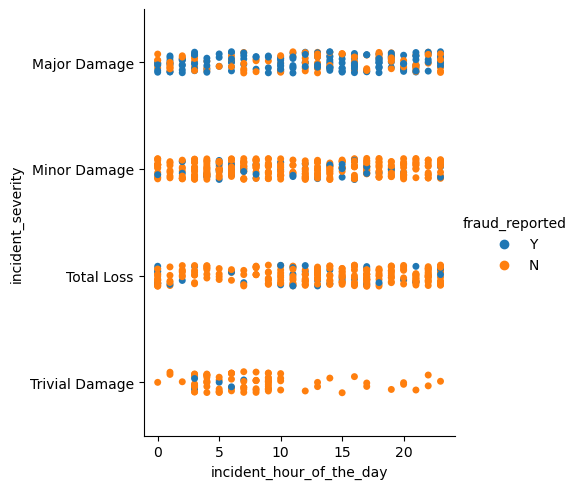

In [57]:
sns.catplot(x='incident_hour_of_the_day',y='incident_severity',data=df,hue='fraud_reported')
plt.show()

we see that more fraud deduction reported on major damages of vehicle hence this also contribute to our target

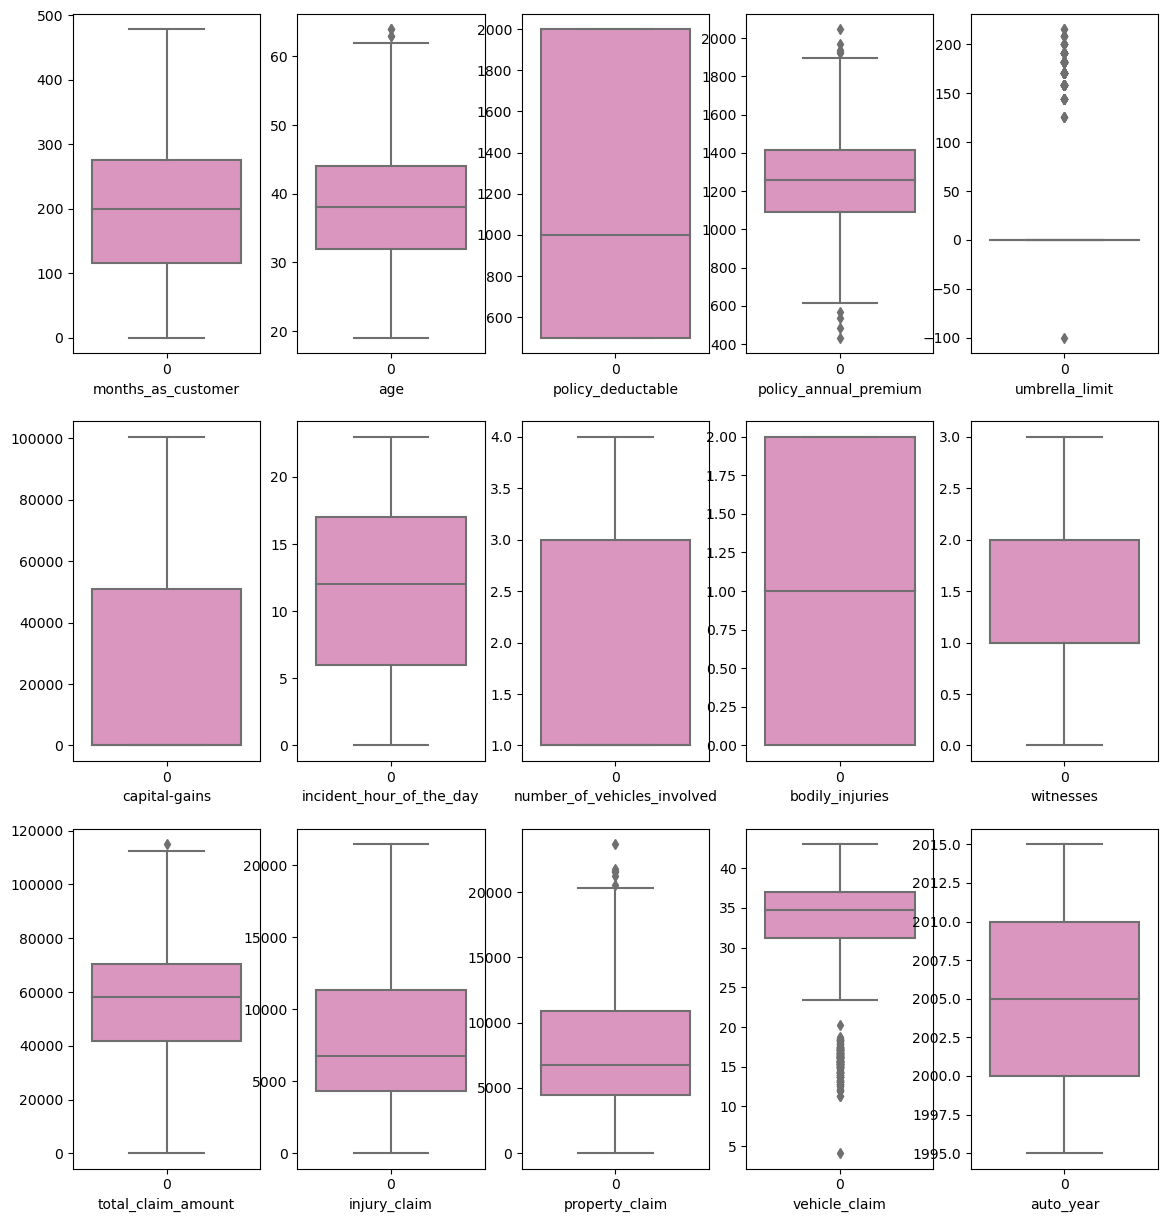

In [14]:
#letschecking outlier from boxplot method
plt.figure(figsize=(14,15))
p=1
for i in  numerical_col:
    if p<=15:
        plt.subplot(3,5,p)
        sns.boxplot(df[i], palette= 'Set2_r')
        plt.xlabel(i)
    p+=1
plt.show()

we see that lot of outlier present in two columns spacially terefore its not much helpful for our model even its also possible to reduce performance of models hence we drop thiscolumns and traetother columns by specific method

In [65]:
numerical_col

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [15]:
from scipy.stats import zscore

out_features = df[['age','policy_annual_premium','umbrella_limit','total_claim_amount','property_claim','vehicle_claim']]
z= np.abs(zscore(out_features))
z

,age,policy_annual_premium,umbrella_limit,total_claim_amount,property_claim,vehicle_claim
0,0.990836,0.616705,0.496576,0.714257,1.165505,0.675827
1,0.334073,0.242521,1.926648,1.807312,1.372696,2.049623
2,1.088913,0.642233,1.926648,0.686362,0.736072,0.415052
3,0.224613,0.652886,2.078484,0.403135,0.219722,0.635470
4,0.552994,1.341980,2.078484,1.753121,1.399654,1.880638
...,...,...,...,...,...,...
995,0.103769,0.222884,0.496576,1.305049,0.273817,0.925562
996,0.224613,0.739141,0.496576,2.111466,2.214794,1.207331
997,0.541611,0.520739,1.547250,0.558507,0.020826,0.688148
998,2.523284,0.411866,1.926648,0.219110,0.451976,0.163801


In [16]:
#threshold=3
np.where(z>3)

(array([229, 248, 500, 763, 775], dtype=int64),
 array([1, 1, 4, 1, 5], dtype=int64))

In [17]:
# now removing data above zscore and creating new dataframe
df1 = df[(z<3).all(axis=1)]
df1.shape

(995, 30)

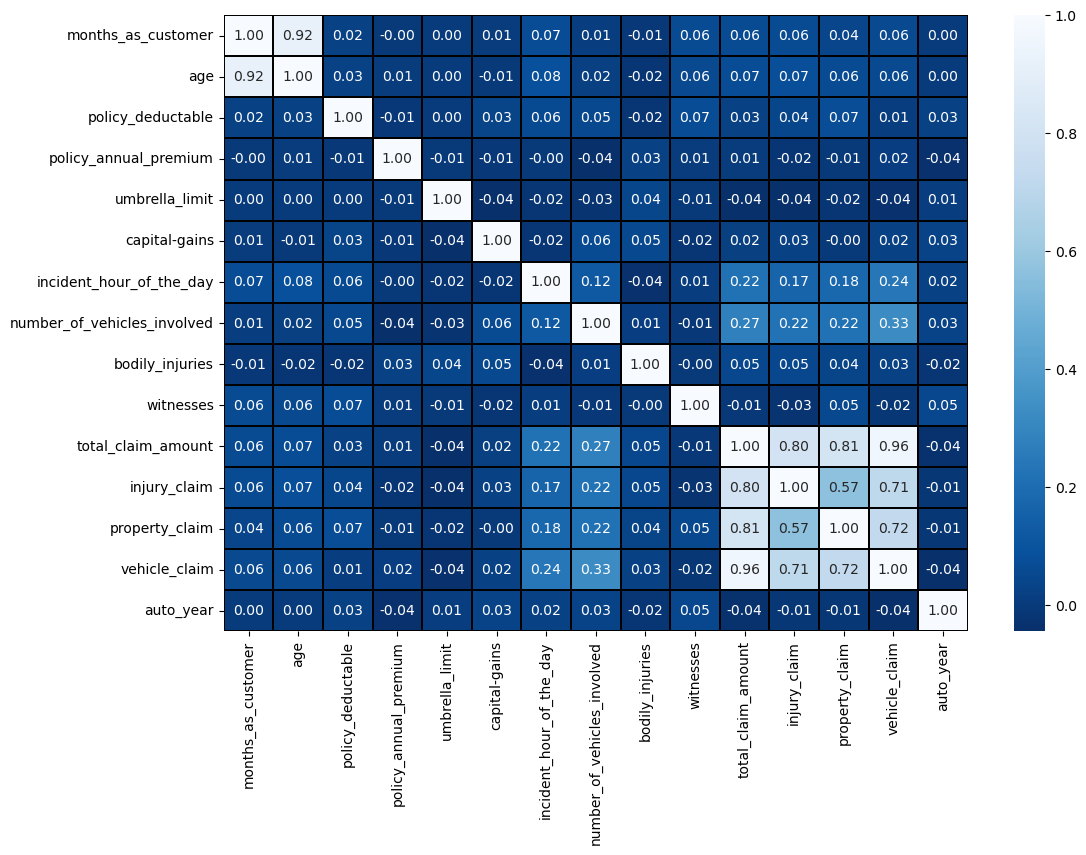

In [18]:
# thenwe checkthe coorelation between target and dependent variables
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), linewidths = 0.2, fmt = '.2f', linecolor= 'black', annot = True, cmap = 'Blues_r')
plt.show()

we see that two columns are highly correlated to target variable hence possibility to multicolinearity of columns hence we drop
one column to achieve performance and other columns are positive and negative correlated to target 

In [19]:
df1.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_relationship', 'capital-gains',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [20]:
# we remove columns whichoccer inmulticolinearity issue
df1.drop('total_claim_amount',axis=1,inplace=True)

In [21]:
df1['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [22]:
# there is targetvariable is in category so weconvertto int type
df1['fraud_reported']=df1['fraud_reported'].map({'N':0, 'Y': 1})

In [23]:
# there are lots of columns which isobject sothat we use encoding to encode them with labelencoder

from sklearn.preprocessing import LabelEncoder

In [24]:
for i in df1.columns:
    if df1[i].dtypes== 'object':
        encoder = LabelEncoder()
        df1[i] = encoder.fit_transform(df1[i])
df1

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_relationship,capital-gains,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1000,1406.91,0.000000,1,4,0,53300,...,1,2,1,6510,13020,37.344243,10,1,2004,1
1,228,42,1,2000,1197.22,170.997595,1,4,2,0,...,0,0,0,780,780,15.197391,8,12,2007,1
2,134,29,2,2000,1413.14,170.997595,0,6,3,35100,...,2,3,0,7700,3850,28.479826,4,30,2007,0
3,256,41,0,2000,1415.74,181.712059,0,6,4,48900,...,1,2,0,6340,6340,37.016306,3,34,2014,1
4,228,44,0,1000,1583.91,181.712059,1,0,4,66000,...,0,1,0,1300,650,16.570558,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0.000000,0,5,4,0,...,0,1,0,17440,8720,39.373574,6,6,2006,0
996,285,41,0,1000,1436.79,0.000000,0,6,5,70900,...,2,3,0,18080,18080,41.663217,13,28,2015,0
997,130,34,2,500,1383.49,144.224957,0,5,2,35100,...,2,3,1,7500,7500,37.444362,11,19,1996,0
998,458,62,0,2000,1356.92,170.997595,1,0,5,0,...,0,1,1,5220,5220,33.183550,1,5,1998,0


In [25]:
# lets seperate the features and target variables
x = df1.drop('fraud_reported',axis=1)
y = df1['fraud_reported']

print(x.shape)
print(y.shape)

(995, 28)
(995,)


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x)
x.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_relationship,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,2,1000,1406.91,0.000000,1,4,0,53300,...,1,1,2,1,6510,13020,37.344243,10,1,2004
1,228,42,1,2000,1197.22,170.997595,1,4,2,0,...,0,0,0,0,780,780,15.197391,8,12,2007
2,134,29,2,2000,1413.14,170.997595,0,6,3,35100,...,0,2,3,0,7700,3850,28.479826,4,30,2007
3,256,41,0,2000,1415.74,181.712059,0,6,4,48900,...,0,1,2,0,6340,6340,37.016306,3,34,2014
4,228,44,0,1000,1583.91,181.712059,1,0,4,66000,...,0,0,1,0,1300,650,16.570558,0,31,2009


In [27]:
#creating train test split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= 23)

In [28]:
# we see that there isimbalanceour target so we balance data sing smote method
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)
count = Counter(y_train)
print(count)

Counter({1: 533, 0: 533})


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [30]:
maxaccu = 0
maxrs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= i)
    lr= LogisticRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu = acc
        maxrs = i
print('best accuracy is', maxaccu, 'at random state', maxrs)

best accuracy is 0.802675585284281 at random state 133


In [31]:
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
predet = et.predict(x_test)
print('accuracy_score :\n',accuracy_score(y_test,predet))
print('\n')
print('cofusion_matrix :\n',confusion_matrix(y_test,predet))
print('\n')
print('classification_report :\n',classification_report(y_test,predet))

accuracy_score :
 0.7491638795986622


cofusion_matrix :
 [[207  19]
 [ 56  17]]


classification_report :
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       226
           1       0.47      0.23      0.31        73

    accuracy                           0.75       299
   macro avg       0.63      0.57      0.58       299
weighted avg       0.71      0.75      0.72       299



In [32]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('accuracy_score :\n',accuracy_score(y_test,preddt))
print('cofusion_matrix :\n',confusion_matrix(y_test,preddt))
print('classification_report :\n',classification_report(y_test,preddt))

accuracy_score :
 0.7157190635451505
cofusion_matrix :
 [[179  47]
 [ 38  35]]
classification_report :
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       226
           1       0.43      0.48      0.45        73

    accuracy                           0.72       299
   macro avg       0.63      0.64      0.63       299
weighted avg       0.73      0.72      0.72       299



In [33]:
sv =  SVC()
sv.fit(x_train,y_train)
predsv = sv.predict(x_test)
print('accuracy_score :\n',accuracy_score(y_test,predsv))
print('cofusion_matrix :\n',confusion_matrix(y_test,predsv))
print('classification_report :\n',classification_report(y_test,predsv))

accuracy_score :
 0.7558528428093646
cofusion_matrix :
 [[226   0]
 [ 73   0]]
classification_report :
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       226
           1       0.00      0.00      0.00        73

    accuracy                           0.76       299
   macro avg       0.38      0.50      0.43       299
weighted avg       0.57      0.76      0.65       299



In [34]:
rf =  RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print('accuracy_score :\n',accuracy_score(y_test,predrf))
print('cofusion_matrix :\n',confusion_matrix(y_test,predrf))
print('classification_report :\n',classification_report(y_test,predrf))

accuracy_score :
 0.7692307692307693
cofusion_matrix :
 [[203  23]
 [ 46  27]]
classification_report :
               precision    recall  f1-score   support

           0       0.82      0.90      0.85       226
           1       0.54      0.37      0.44        73

    accuracy                           0.77       299
   macro avg       0.68      0.63      0.65       299
weighted avg       0.75      0.77      0.75       299



In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predk1 = knn.predict(x_test)
print('accuracy_score :\n',accuracy_score(y_test,predk1))
print('\n')
print('cofusion_matrix :\n',confusion_matrix(y_test,predk1))
print('\n')
print('classification_report :\n',classification_report(y_test,predk1))

accuracy_score :
 0.7123745819397993


cofusion_matrix :
 [[202  24]
 [ 62  11]]


classification_report :
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       226
           1       0.31      0.15      0.20        73

    accuracy                           0.71       299
   macro avg       0.54      0.52      0.51       299
weighted avg       0.66      0.71      0.67       299

